Creating and example code structure

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

Retrieving UPPSLA conflict data

In [3]:
directory = "C:/data/UPPSLA conflict data/"
file_name = "Geo_locations_of_conflicts.csv"
path_to_file = directory+file_name

df_UPPSLA_geo= pd.read_csv(path_to_file, encoding="latin1")

In [35]:
limit_rows_for_now = 100000
df_UPPSLA_geo = df_UPPSLA_geo.head(limit_rows_for_now)
lat = df_UPPSLA_geo["latitude"]
lon = df_UPPSLA_geo["longitude"]
z = df_UPPSLA_geo["high"]

map_df = pd.DataFrame([lon, lat]).transpose()

,longitude,latitude
0,44.206667,15.354722
1,45.036667,12.779444
2,46.141765,13.786202
3,46.141765,13.786202
4,45.300000,15.616667
...,...,...
495,45.380728,13.128712
496,45.380728,13.128712
497,45.380728,13.128712
498,45.380728,13.128712


In [26]:


# Make this example reproducible:
np.random.seed(89239413)

# Generate random data following a uniform spatial distribution
# of nodes and a uniform distribution of values in the interval
# [2.0, 5.5]:
N = 500

""" lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0 """

# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, N)
grid_lat = np.linspace(-90.0, 90.0, N)

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

Plotting data on a map

<AxesSubplot: >

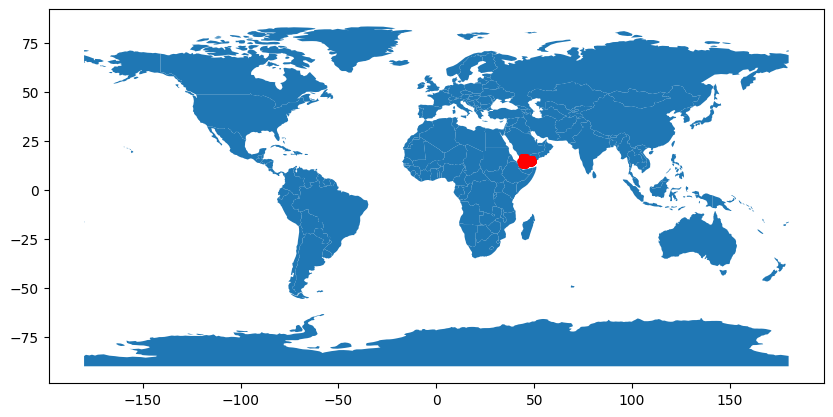

In [36]:
#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)



geometry = [Point(xy) for xy in zip(lon, lat)]
gdf = GeoDataFrame(map_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

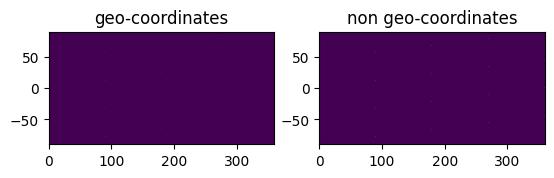

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()